# **Problem Statement**

The aim of this project is to develop a robust wine classification model using XGBoost (Extreme Gradient Boosting) to categorize different wines into Customer Segments (1, 2, or 3) based on their chemical composition.

The dataset, Wine.csv, contains 13 physicochemical properties of wines such as alcohol content, flavonoid concentration, magnesium level, and color intensity.
The challenge is to accurately classify each wine sample using these numerical features while minimizing prediction errors.

By applying XGBoost, a high-performance gradient boosting algorithm, this project demonstrates how ensemble methods can significantly enhance model accuracy and reliability for multi-class classification problems in structured datasets.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

loading dataset

In [2]:
df = pd.read_csv("/content/Wine.csv")

EDA

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [10]:
dups=df.duplicated()
print("the number od duplicate rows =%d"%(dups.sum()))

the number od duplicate rows =0


Box plot to find outliers

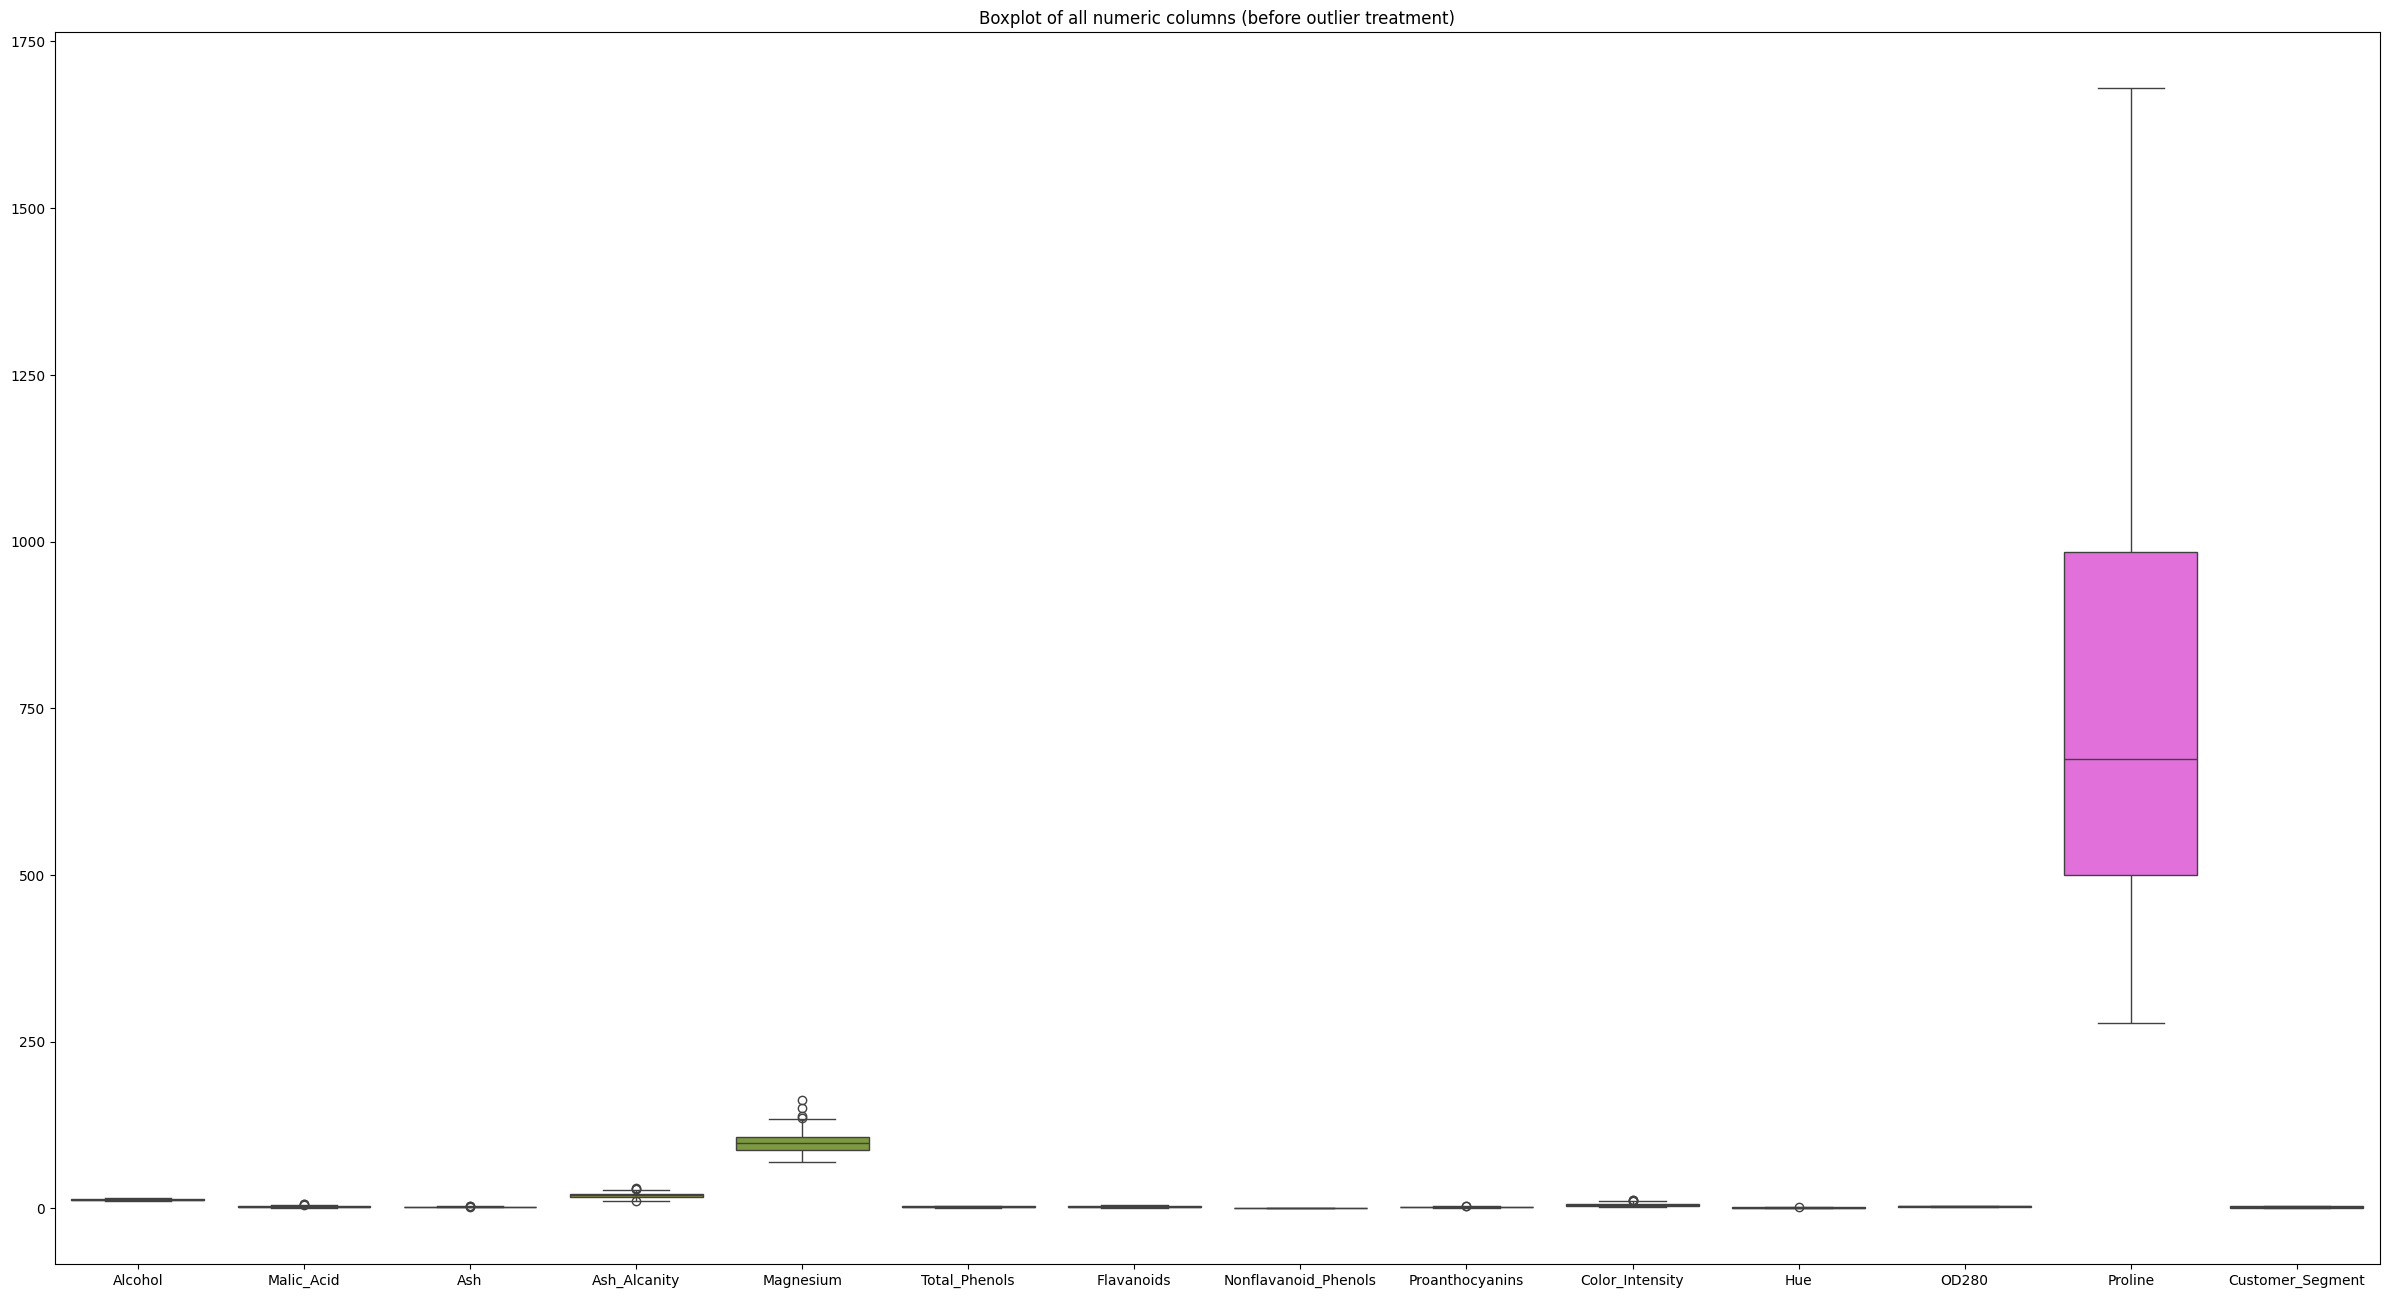

In [11]:
plt.figure(figsize=(30,16))
sns.boxplot(data=df)
plt.title("Boxplot of all numeric columns before outlier treatment")
plt.show()

treating outliers

In [12]:
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [15]:
df['Customer_Segment'] = pd.to_numeric(df['Customer_Segment'], errors='coerce')
df.dropna(inplace=True)

In [16]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        lr, ur = remove_outlier(df[column])
        df[column] = np.where(df[column] > ur, ur, df[column])
        df[column] = np.where(df[column] < lr, lr, df[column])

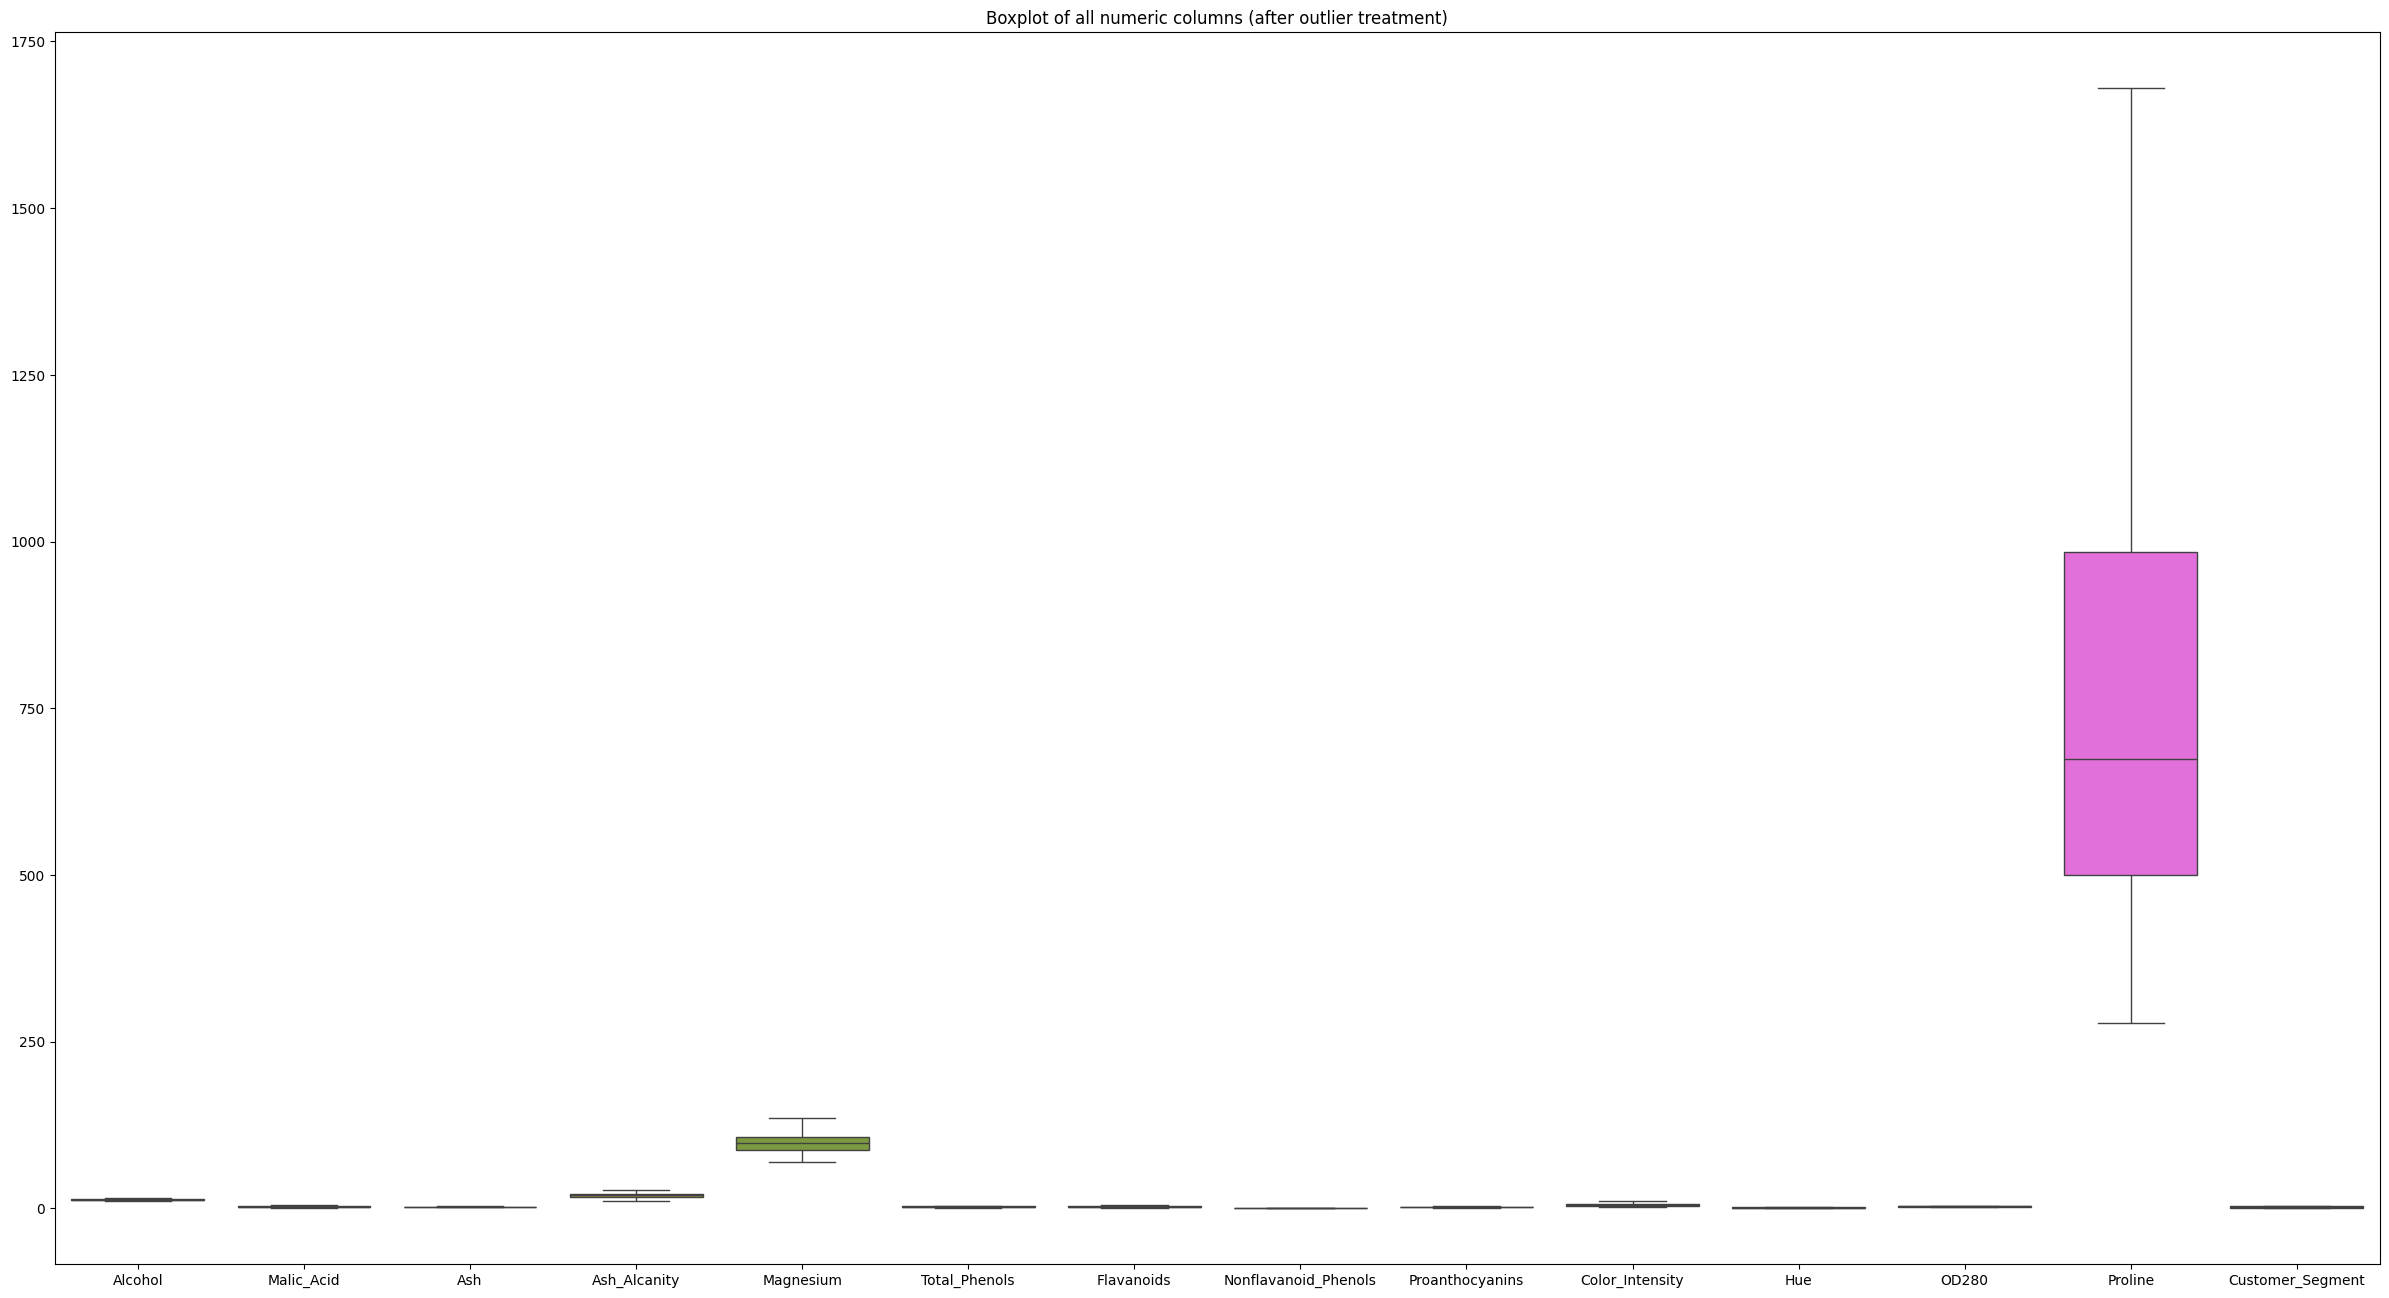

In [17]:
plt.figure(figsize=(30,16))
sns.boxplot(data=df)
plt.title("Boxplot of all numeric columns (after outlier treatment)")
plt.show()

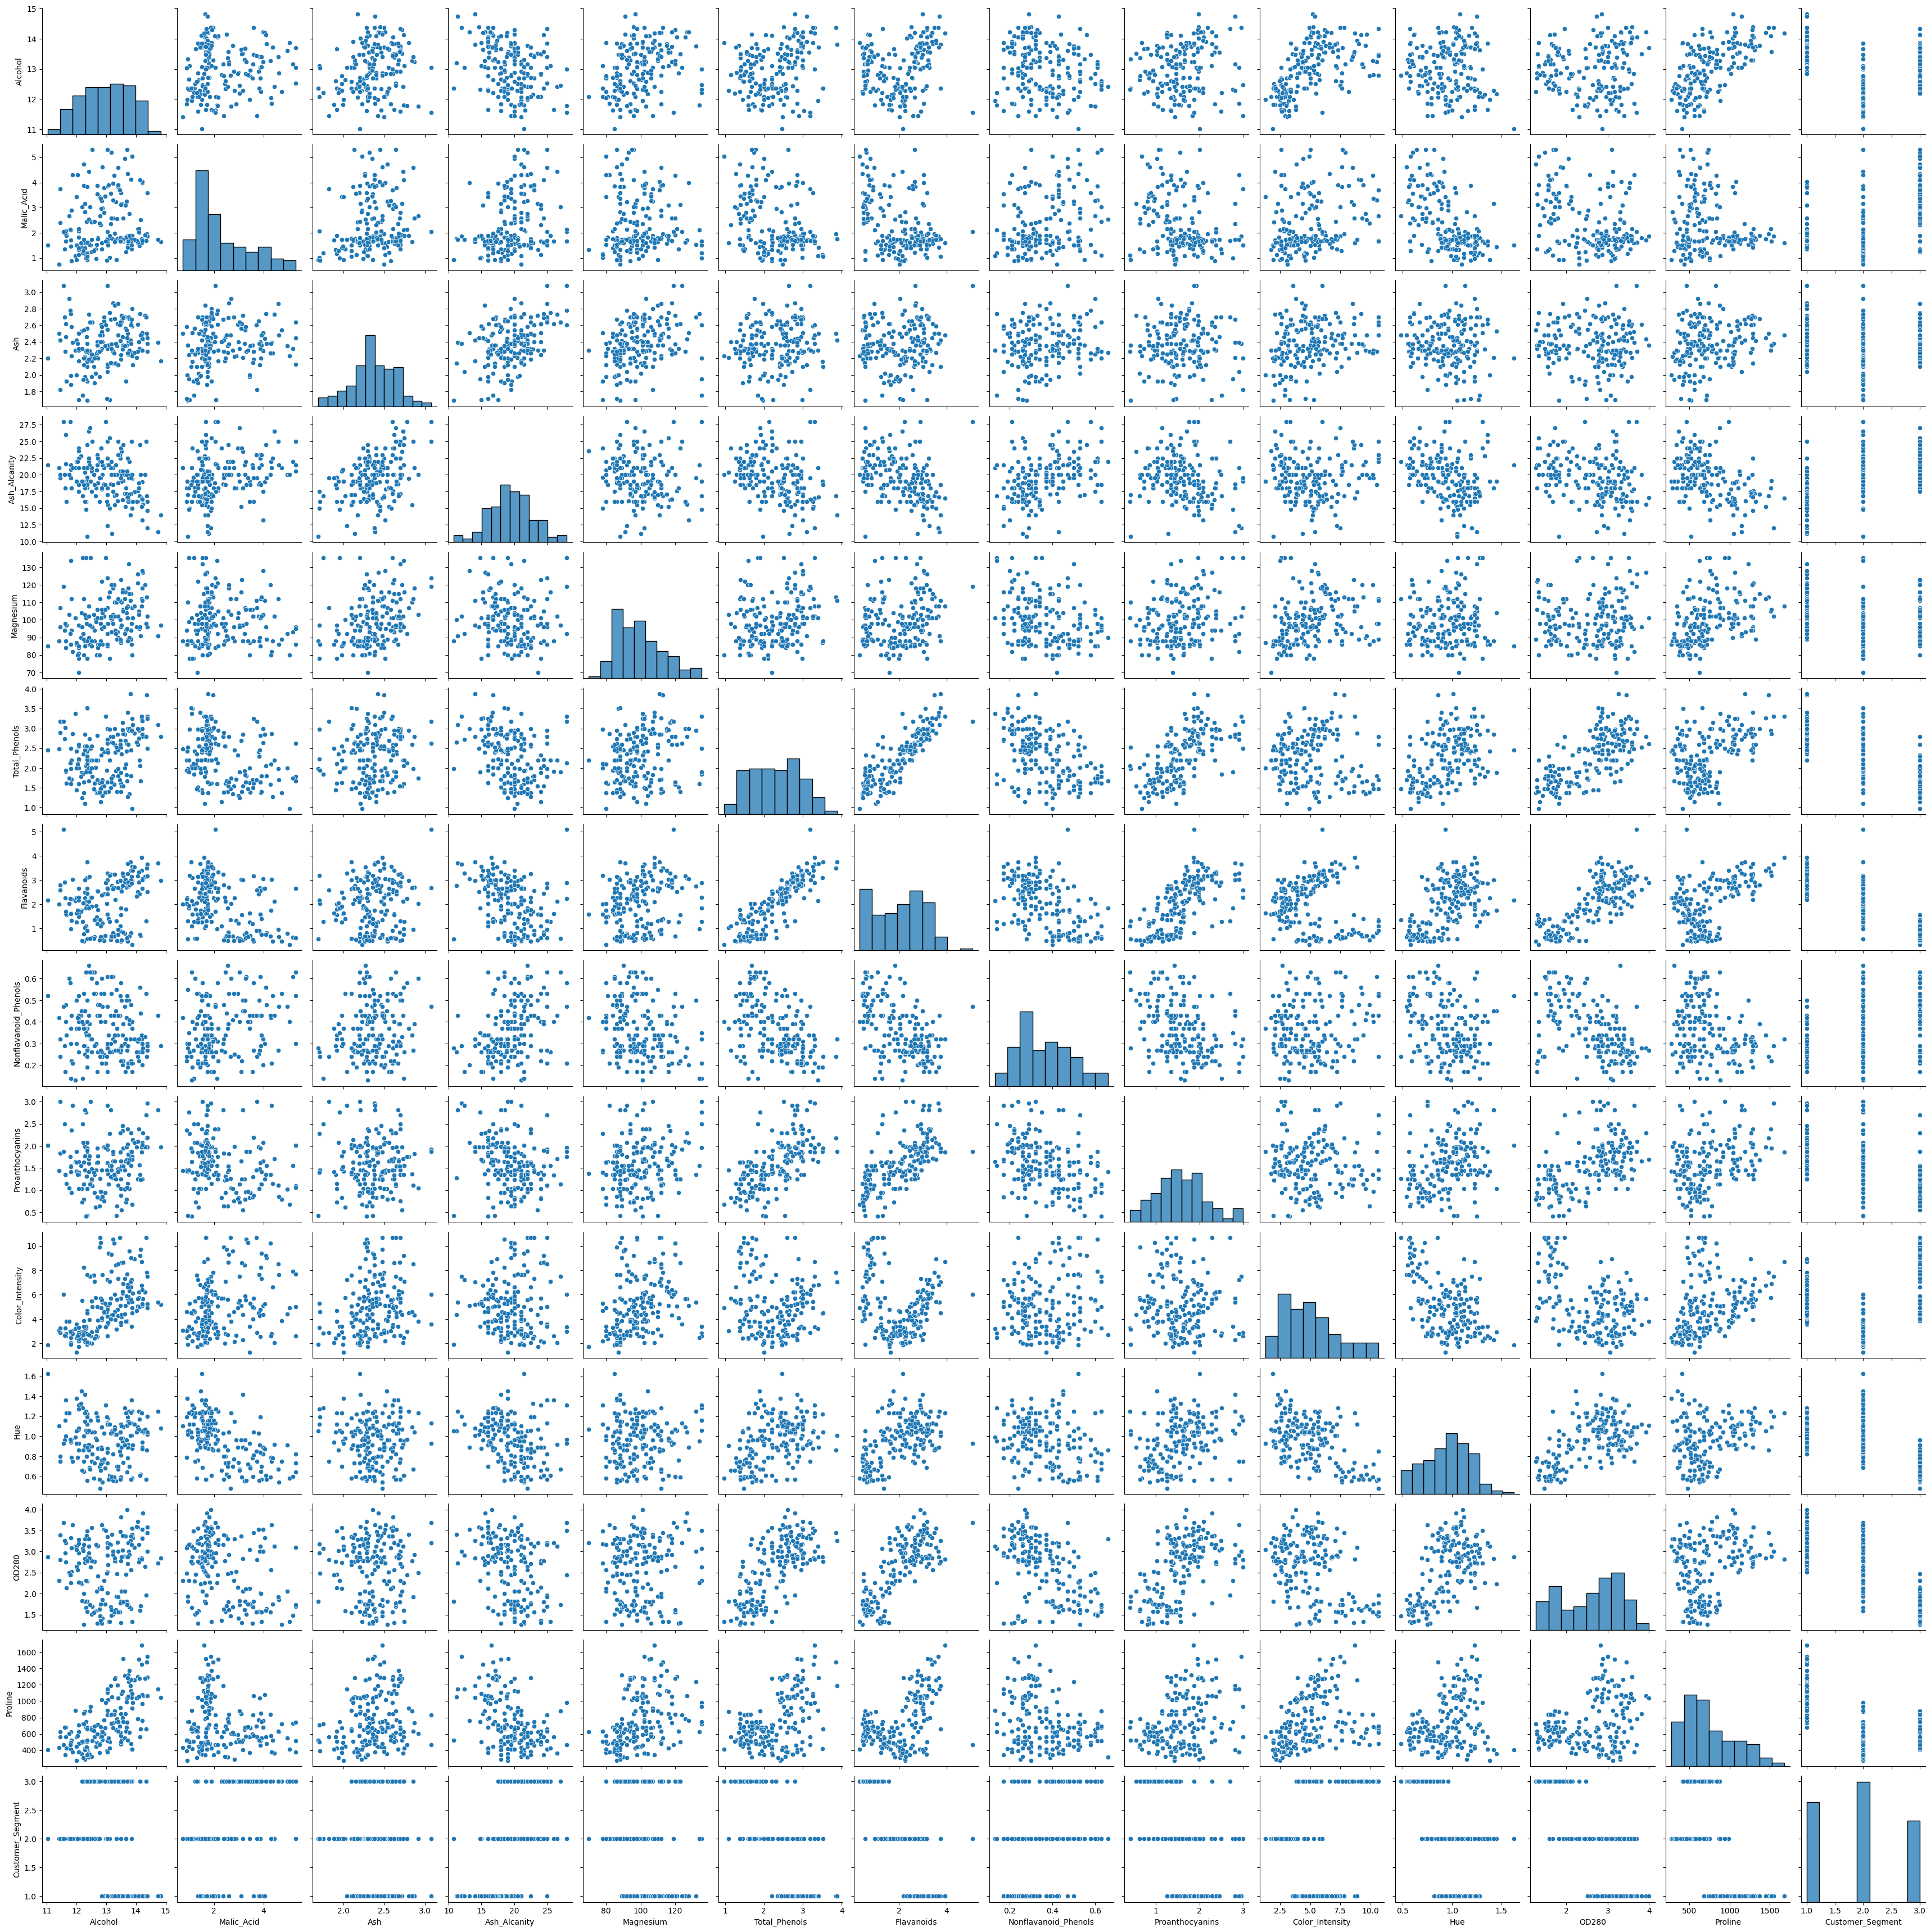

In [19]:
sns.pairplot(df)
plt.show()

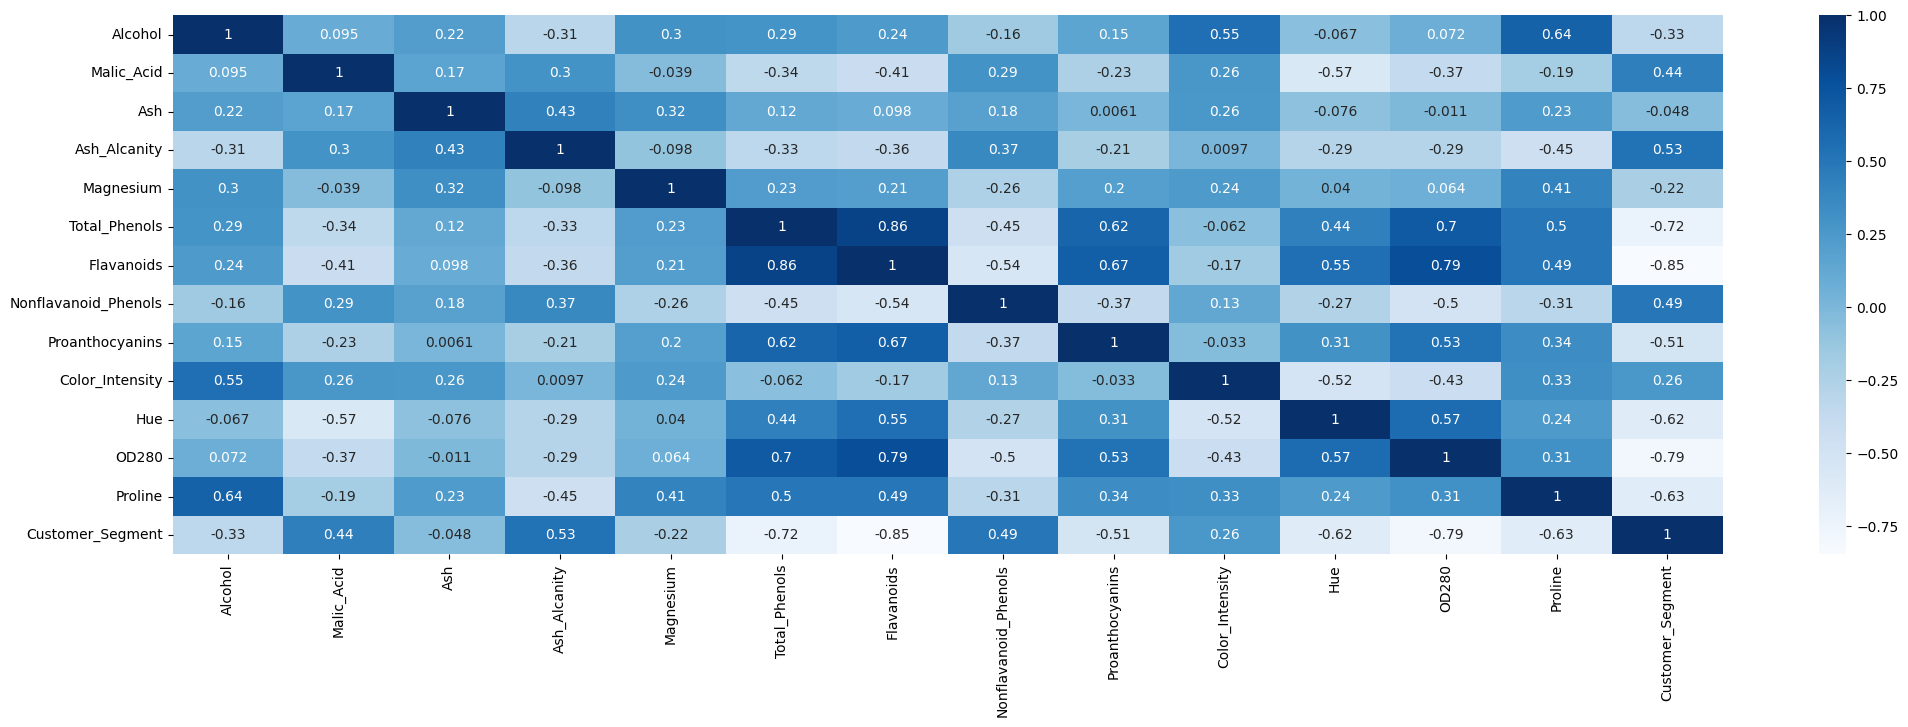

In [20]:
plt.figure(figsize=(25,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

train test split

In [21]:
x=df.drop("Customer_Segment",axis=1)
y=df[["Customer_Segment"]]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Application of XGBoost

In [24]:
from xgboost import XGBClassifier

my_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_alpha=0.2,
    reg_lambda=1.0,
    random_state=42
)
y_train = y_train - 1
y_test = y_test - 1

my_model.fit(x_train, y_train)
y_pred = my_model.predict(x_test)

Training accuracy

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,my_model.predict(x_train))

1.0

Testing Accuracy

In [26]:
accuracy_score(y_test,y_pred)

0.9814814814814815

RMSE for training and testing data

In [27]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, my_model.predict(x_train))
mse_test = mean_squared_error(y_test, y_pred)
mse_train, mse_test

(0.0, 0.018518518518518517)

Confusion Matrix

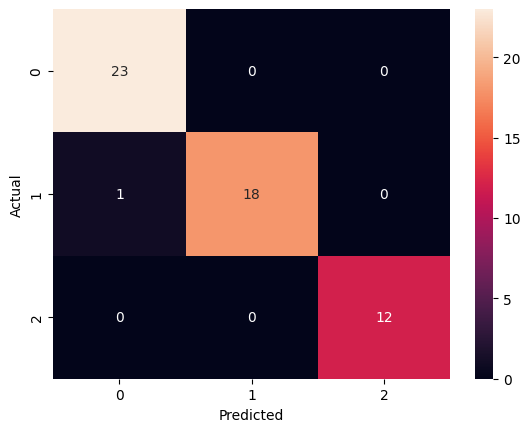

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report

In [30]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        23
         1.0       1.00      0.95      0.97        19
         2.0       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# **Conclusion**

The XGBoost model achieved an impressive accuracy of 98%, confirming its effectiveness in classifying wine samples based on their chemical attributes.
The model demonstrated strong generalization, with precision, recall, and F1-scores all reaching 0.98, indicating near-perfect classification consistency across all three wine categories.

Feature importance analysis revealed that Alcohol, Flavanoids, Proline, and Color Intensity were among the most influential predictors in determining wine segment.

In summary, XGBoost proved to be a highly efficient algorithm for this classification problem — delivering fast training, high interpretability, and exceptional accuracy, making it a strong baseline for future wine quality prediction models.